In [ ]:
#Import libraries
import joblib
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#Load test data
X_test, y_test, y_pred = joblib.load("../models/test_data.pkl")

In [ ]:
#Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       551
           1       0.98      0.93      0.95       595

    accuracy                           0.95      1146
   macro avg       0.95      0.95      0.95      1146
weighted avg       0.95      0.95      0.95      1146



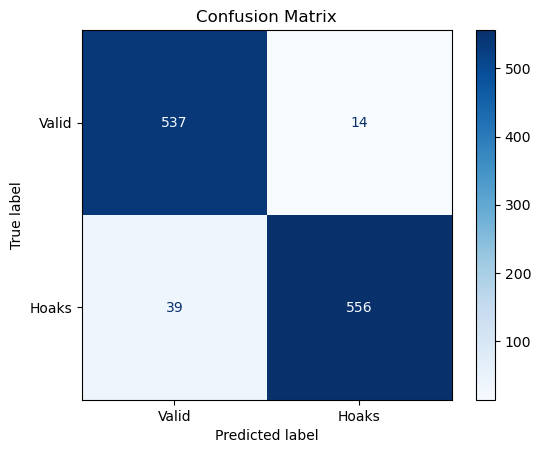

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Valid", "Hoaks"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

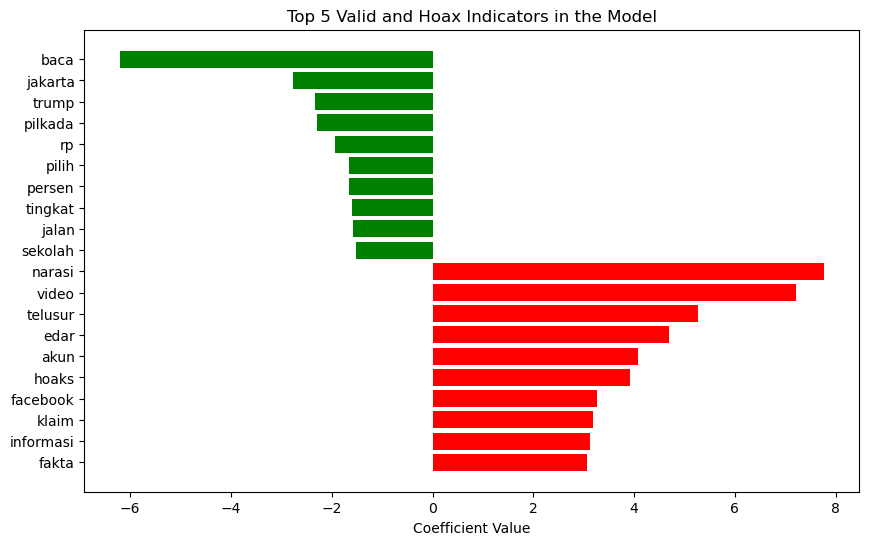

In [20]:
# Load vectorizer and model
vectorizer = joblib.load("../models/vectorizer.pkl")
model = joblib.load("../models/hoax_model.pkl")

# Get feature names and model coefficients
feature_names = np.array(vectorizer.get_feature_names_out())
coefficients = model.coef_[0]

# Get indices for top 5 negative (valid) and top 5 positive (hoax) words
top_negative_idx = np.argsort(coefficients)[:10]     # Most negative = strong valid indicator
top_positive_idx = np.argsort(coefficients)[-10:][::-1]  # Most positive = strong hoax indicator

# Combine indices and get corresponding words and coefficients
top_indices = np.concatenate([top_negative_idx, top_positive_idx])
top_words = feature_names[top_indices]
top_coefficients = coefficients[top_indices]

# Color coding: green for valid, red for hoax
colors = ['green'] * 10 + ['red'] * 10

# Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_words, top_coefficients, color=colors)
plt.xlabel("Coefficient Value")
plt.title("Top 5 Valid and Hoax Indicators in the Model")
plt.gca().invert_yaxis()  # Show strongest feature at the top
plt.show()


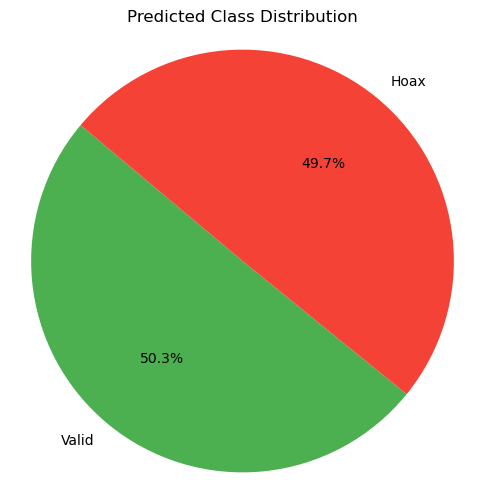

In [ ]:
#Pie Chart of predicted classes
pred_counts = pd.Series(y_pred).value_counts().sort_index()
labels = ['Valid', 'Hoax']
sizes = [pred_counts.get(0, 0), pred_counts.get(1, 0)]
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Predicted Class Distribution")
plt.axis('equal')
plt.show()